In [1]:
from levee_hunter.processing.dataset_images_choice import interactive_images_selection
from levee_hunter.levees_dataset import LeveesDataset
from levee_hunter.train_test_val_splitting import validation_split, train_test_split_dataset

/home/pmucha/.conda/envs/fathom/lib/python3.11/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/home/pmucha/.conda/envs/fathom/lib/python3.11/site-packages/albumentations/core/validation.py:58: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
/share/gpu5/pmucha/fathom/levee-hunter/levee_hunter/augmentations.py:16: UserWarning: Argument(s) 'alpha_affine' are not valid for transform ElasticTransform
  A.ElasticTransform(
/share/gpu5/pmucha/fathom/levee-hunter/levee_hunter/augmentations.py:19: UserWarning: Using lambda is incompatible with multiprocessing. Consider using regular functions or partial().
  A.Lambda(
/share/gpu5/pmucha/fathom/levee-hu

Image passed overlap check.
Progress: 1/6736 

Currently Processing: ../data/intermediate/1m_1024/images/USGS_1M_15_x32y439_MO_Northern_SEMO_2021_D21_p7.tif


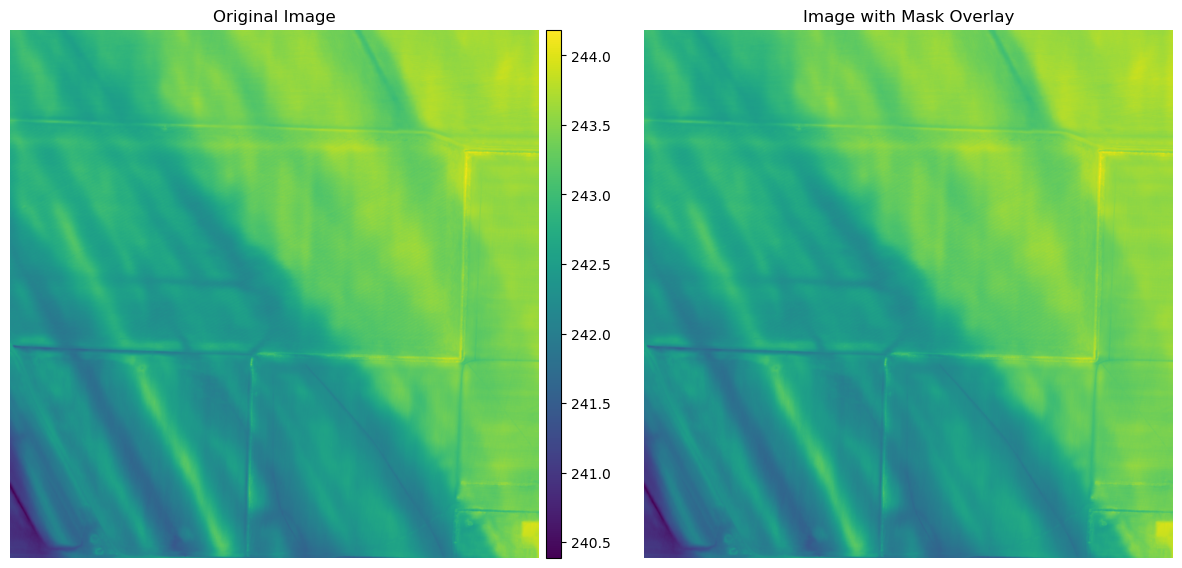

In [2]:
# please note, the dilation_size is only for visualisation.
interactive_images_selection(
    intermediate_data_path="../data/intermediate/1m_1024",
    output_dir='../data/processed/1m_1024_old', 
    dilation_size=7,         # for visualisation only, choose your preference
    figsize=(15, 9),         # for visualisation only
    cmap='viridis',          # for visualisation only
    plot_types=['image', 'image_mask_overlay'],       # for visualisation only
    file_ids_toprocess=None,
    powernorm_threshold=40,  # for visualisation only
    store_bad_bounds=False,
    store_bad_images=False,
    helper=None
    )

In [3]:
dataset = LeveesDataset(
    images_dir='../data/processed/1m_1024_old/images',
    masks_dir='../data/processed/1m_1024_old/masks',
    transform=None,
    weighted=True,
    )

len(dataset)

890

In [ ]:
#dataset.apply_mask_type(mask_type='dilated', dilation_size=8)

Processing masks: 100%|██████████| 890/890 [00:48<00:00, 18.24it/s]


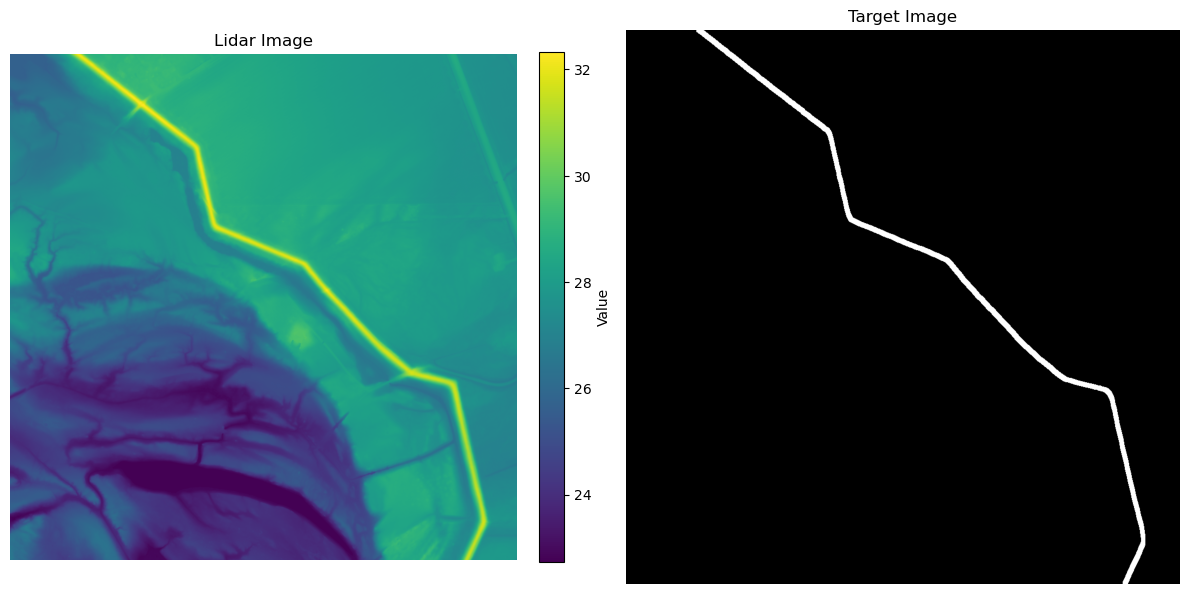

In [4]:
dataset.plot(idx=100, figsize=(12, 6), cmap='viridis', transform=False)

In [5]:
dataset.img_paths[:5]

[PosixPath('../data/processed/1m_1024_old/images/USGS_1M_10_x56y522_WA_PierceCounty_2020_A20_p0_w1.tif'),
 PosixPath('../data/processed/1m_1024_old/images/USGS_1M_10_x56y522_WA_PierceCounty_2020_A20_p10_w1.tif'),
 PosixPath('../data/processed/1m_1024_old/images/USGS_1M_10_x56y522_WA_PierceCounty_2020_A20_p11_w2.tif'),
 PosixPath('../data/processed/1m_1024_old/images/USGS_1M_10_x56y522_WA_PierceCounty_2020_A20_p13_w2.tif'),
 PosixPath('../data/processed/1m_1024_old/images/USGS_1M_10_x56y522_WA_PierceCounty_2020_A20_p17_w1.tif')]

In [6]:
dataset.file_ids[:5]

['USGS_1M_10_x56y522_WA_PierceCounty_2020_A20',
 'USGS_1M_10_x56y522_WA_PierceCounty_2020_A20',
 'USGS_1M_10_x56y522_WA_PierceCounty_2020_A20',
 'USGS_1M_10_x56y522_WA_PierceCounty_2020_A20',
 'USGS_1M_10_x56y522_WA_PierceCounty_2020_A20']

In [7]:
dataset.weights[:5]

[1, 1, 2, 2, 1]

In [9]:
sorted(set(dataset.file_ids))[:15]

['USGS_1M_10_x56y522_WA_PierceCounty_2020_A20',
 'USGS_1M_10_x56y524_WA_KingCounty_2021_B21',
 'USGS_1M_11_x46y368_San_Diego_CA_2014_LiDAR',
 'USGS_1M_13_x49y439_CO_DRCOG_2020_B20',
 'USGS_1M_13_x50y441_CO_DRCOG_2020_B20',
 'USGS_1M_13_x51y440_CO_DRCOG_2020_B20',
 'USGS_1M_14_x41y418_KS_StatewideFordGray_2018_A18',
 'USGS_1M_15_x36y434_MO_FEMANRCS_2020_D20',
 'USGS_1M_15_x37y434_MO_FEMANRCS_2020_D20',
 'USGS_1M_15_x38y435_MO_FEMANRCS_2020_D20',
 'USGS_1M_15_x50y350_LA_Sabine_River_Lidar_2018_D18',
 'USGS_1M_15_x53y348_LA_Sabine_River_Lidar_2018_D18',
 'USGS_1M_15_x54y347_LA_Sabine_River_Lidar_2018_D18',
 'USGS_1M_15_x55y346_LA_Sabine_River_Lidar_2018_D18',
 'USGS_1M_15_x55y347_LA_Sabine_River_Lidar_2018_D18']

In [ ]:
from levee_hunter.train_test_val_splitting import validation_split

file_ids = sorted(set(dataset.file_ids))[:15]
train_test_dataset, val_dataset = validation_split(dataset=dataset, file_ids=file_ids)

len(train_test_dataset), len(val_dataset)

(759, 131)

In [11]:
from levee_hunter.train_test_val_splitting import train_test_split_dataset

train_dataset, test_dataset = train_test_split_dataset(dataset=train_test_dataset, test_size=0.15)

len(train_dataset), len(test_dataset), len(val_dataset)

(645, 114, 131)

In [12]:
# we can check if their transformations are what we want them to be
train_dataset.transform, test_dataset.transform, val_dataset.transform

('train_transform', 'normalize_only', 'normalize_only')

In [13]:
# test and validation should be unweighted
test_dataset.weighted=False
val_dataset.weighted=False
train_dataset.weighted

True

In [14]:
import torch
from torch.utils.data import DataLoader

batch_size = 14

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=len(val_dataset), shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [15]:
import segmentation_models_pytorch as smp
import torch.optim as optim

model = smp.Segformer(
    encoder_name="mit_b0",      # Use the MIT-B0 encoder for SegFormer
    encoder_weights="imagenet", # Pretrained on ImageNet
    in_channels=1,              # Input channels (e.g. grayscale images)
    classes=1                   # Number of output classes
).to(device)


optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [16]:
len(train_loader), len(test_loader), len(val_loader)

(47, 12, 1)

In [17]:
import torch.nn as nn

from levee_hunter.modeling.train import train_model

model, train_loss, val_loss = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=test_loader,
    optimizer=optimizer,
    criterion=nn.BCEWithLogitsLoss(reduction="none"),
    epochs=50,
    save_model='best',
    save_model_path="../models/1m_1024_old/Segformer-b0_old.pth",
)

beginning training on device: cuda
Epoch: 1/50 Train Loss: 0.238906 Val Loss: 0.101980
Model successfully saved to: ../models/1m_1024_old/Segformer-b0_old.pth
Epoch: 2/50 Train Loss: 0.099003 Val Loss: 0.045490
Model successfully saved to: ../models/1m_1024_old/Segformer-b0_old.pth
Epoch: 3/50 Train Loss: 0.074534 Val Loss: 0.038789
Model successfully saved to: ../models/1m_1024_old/Segformer-b0_old.pth
Epoch: 4/50 Train Loss: 0.058418 Val Loss: 0.034933
Model successfully saved to: ../models/1m_1024_old/Segformer-b0_old.pth
Epoch: 5/50 Train Loss: 0.055613 Val Loss: 0.026987
Model successfully saved to: ../models/1m_1024_old/Segformer-b0_old.pth
Epoch: 6/50 Train Loss: 0.051988 Val Loss: 0.030160
Epoch: 7/50 Train Loss: 0.046131 Val Loss: 0.023183
Model successfully saved to: ../models/1m_1024_old/Segformer-b0_old.pth
Epoch: 8/50 Train Loss: 0.040237 Val Loss: 0.021213
Model successfully saved to: ../models/1m_1024_old/Segformer-b0_old.pth
Epoch: 9/50 Train Loss: 0.040228 Val Loss: 0.

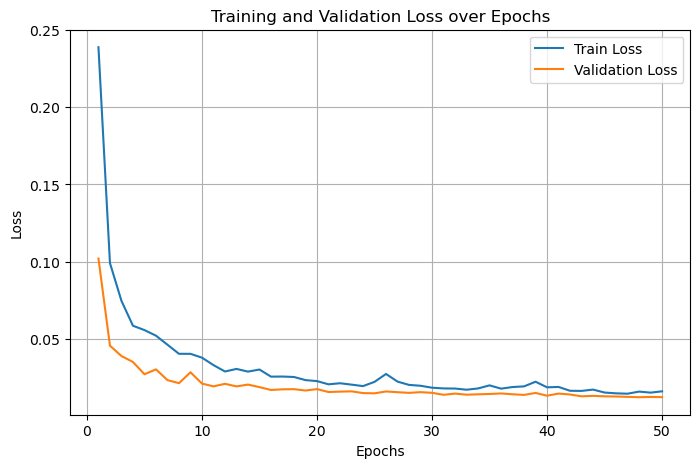

In [18]:
from levee_hunter.plots import plot_training_validation_loss
plot_training_validation_loss(train_loss[:], val_loss[:])

In [20]:
# load the saved model
model.load_state_dict(torch.load("../models/1m_1024_old/Segformer-b0_old.pth"))
model.eval()

Segformer(
  (encoder): MixVisionTransformerEncoder(
    (patch_embed1): OverlapPatchEmbed(
      (proj): Conv2d(1, 32, kernel_size=(7, 7), stride=(4, 4), padding=(3, 3))
      (norm): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
    )
    (patch_embed2): OverlapPatchEmbed(
      (proj): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    )
    (patch_embed3): OverlapPatchEmbed(
      (proj): Conv2d(64, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (norm): LayerNorm((160,), eps=1e-05, elementwise_affine=True)
    )
    (patch_embed4): OverlapPatchEmbed(
      (proj): Conv2d(160, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
    )
    (block1): Sequential(
      (0): Block(
        (norm1): LayerNorm((32,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (q): Linear(in_features=

0


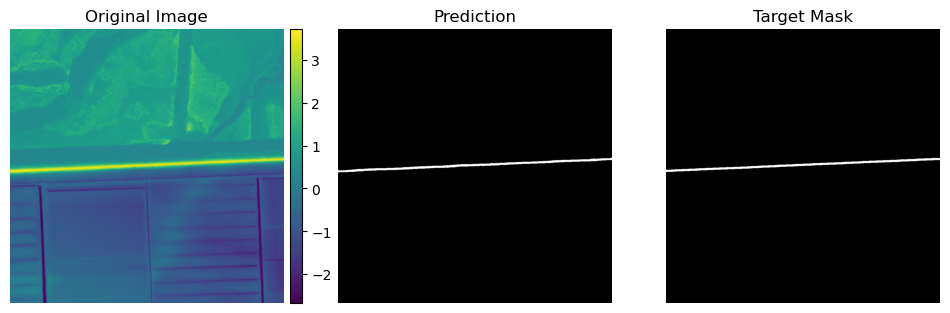

1


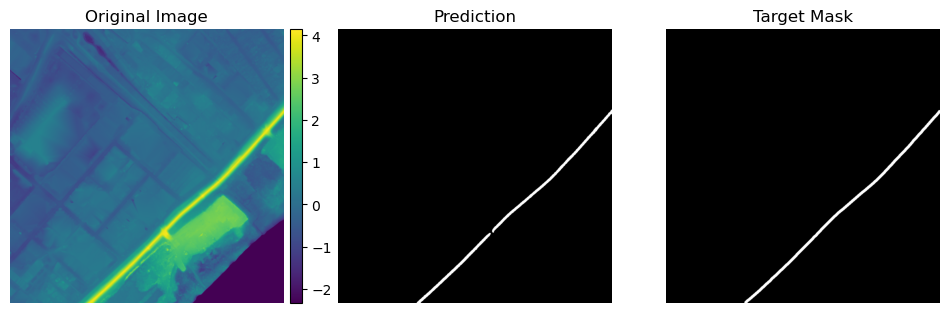

2


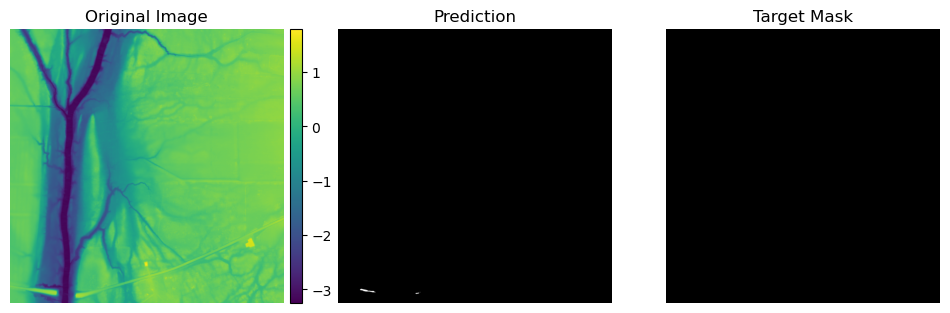

3


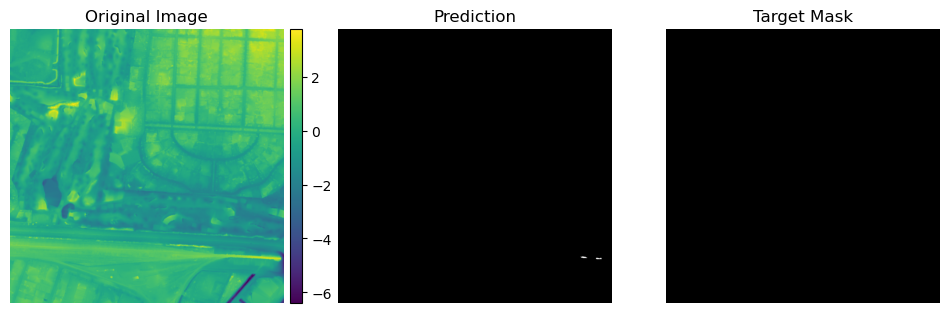

4


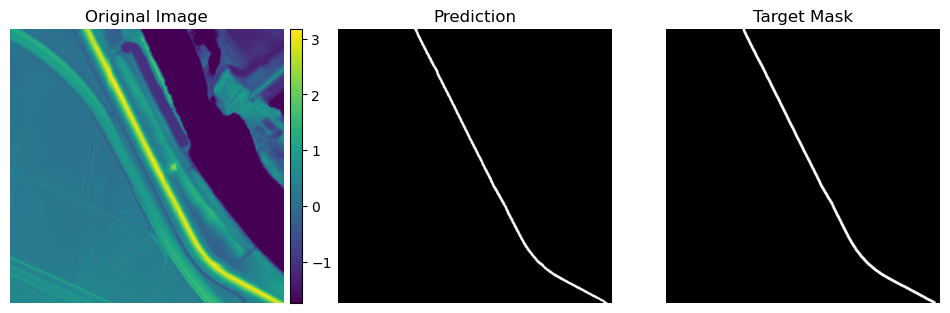

In [21]:
from levee_hunter.plots import infer_and_visualize
for ix in range(5):
    sample_image, sample_mask = test_dataset[ix]
    print(ix)
    output = infer_and_visualize(model, sample_image, sample_mask, apply_sigmoid=True, device=device)

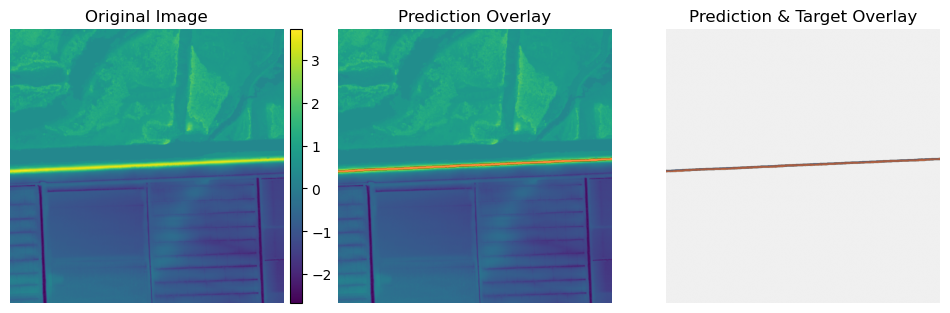

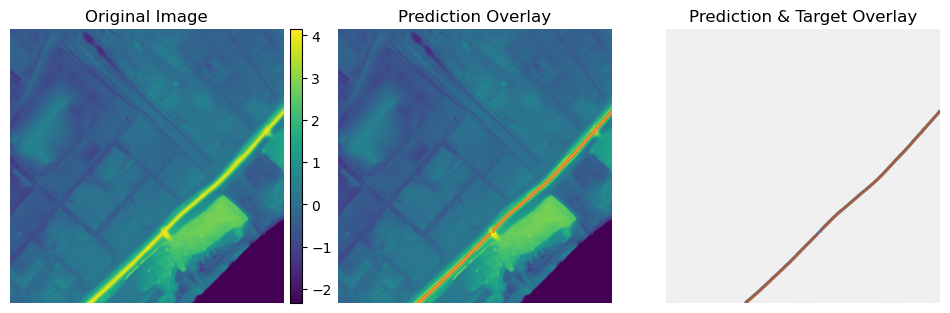

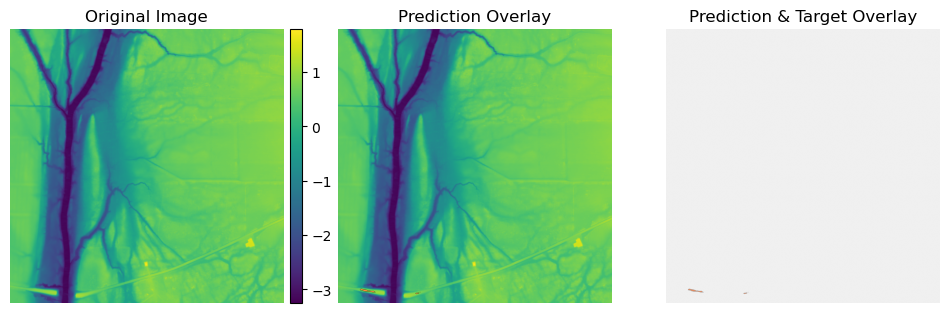

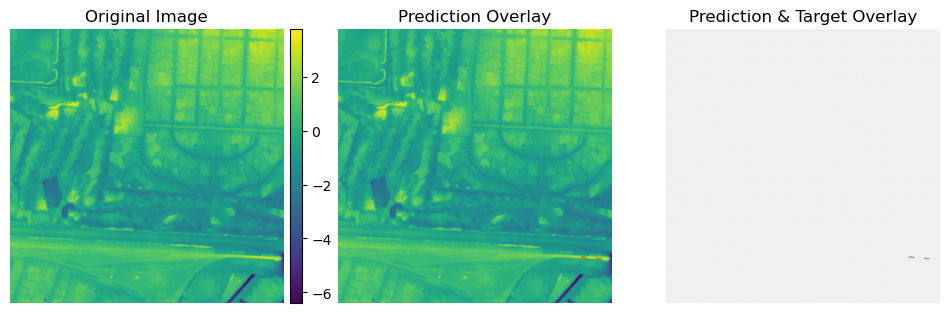

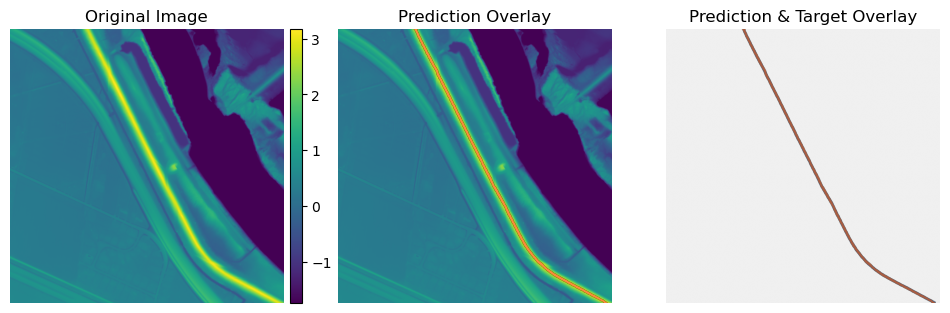

In [22]:
from levee_hunter.plots import infer_and_plot_overlap


for ix in range(5):
    img, target = test_dataset[ix]
    output = infer_and_plot_overlap(
        model=model, 
        image_tensor=img, 
        mask_tensor=target, 
        device=device, apply_sigmoid=True, 
        threshold=0.5, 
        invert=True
        )

In [23]:
from levee_hunter.modeling.inference import get_preds_targets

all_preds, all_targets = get_preds_targets(model, test_loader, device=device)

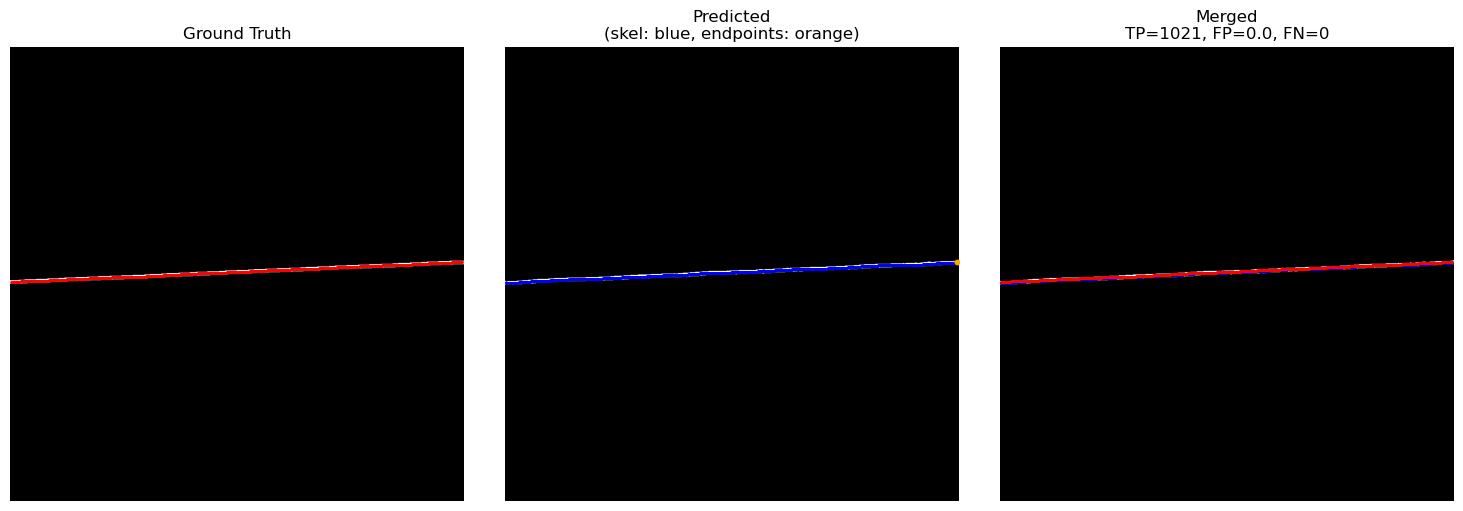

In [24]:
from levee_hunter.modeling.metrics import get_pred_mask, plot_skeletons, custom_metrics, standard_metrics

i = 0
pred_mask, target_mask = get_pred_mask(all_preds, all_targets, i)

plot_skeletons(pred_mask, d=13, d_merge=16, gt_mask=target_mask)

In [25]:
custom_metrics(targets=all_targets, predictions=all_preds, d=13, d_merge=16)

-----------------------Custom Metrics-----------------------
IoU Score:         0.7695
F1 Score (Dice):   0.8697
Recall:            0.8702
------------------------------------------------------------


In [26]:
standard_metrics(targets=all_targets, predictions=all_preds, threshold=0.5)

----------------------Standard Metrics----------------------
IoU Score:         0.5947
F1 Score (Dice):   0.7458
Accuracy:          0.9960
Recall:            0.7373
------------------------------------------------------------


In [ ]:
#from monai.losses import TverskyLoss

#tversky_loss = TverskyLoss(alpha=0.4, beta=0.6, reduction="none")